##api key

In [4]:
import os
from dotenv import load_dotenv
# Load environment variables from .env file (in parent directory)
load_dotenv(dotenv_path='../.env')
# Get the API_KEY from environment
api_key = os.getenv('API_KEY')
if api_key:
    print("✓ API Key loaded successfully!")
else:
    print("✗ Warning: API_KEY not found in .env file")

✓ API Key loaded successfully!


##code

In [1]:
#install the libraries and import them
!pip install pylatexenc
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit_ibm_runtime

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136928 sha256=23bfe53e120ec5717686f2b1235608adf0ed3300f588e4247f8c477b81dd2fea
  Stored in directory: c:\users\roose\appdata\local\pip\cache\wheels\06\3e\78\fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.6 MB 7.6 MB/s eta 0:00:01
   -------------- ------------------------- 3.1/8.6 MB 8.0 MB/s eta 0:00:01
   --------------------- ------------------ 4.7/8.6 MB 7.9 MB/s eta 0:00:01
   ------------------------------- -------- 6.8/8.6 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 8.6/8.6 MB 8.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ------------------------------ --------- 1.6/2.1 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 8.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------- -------------------------------- 1.8/9.6 MB 9.1 MB/s eta 0:00:01
   -------------- ------------------------- 3.4/9.6 MB 8.4 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.6 MB 8.8 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 8.7 MB/s eta 0:00:01
   ------------------------------------ --- 8.7/9.6 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 8.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 10.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 10.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
   ------------------------ --------------- 2.1/3.5 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 3.5/3.5 MB 10.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/540.8 kB ? eta -:--:--
   ---------------------------------------- 540.8/540.8 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.3.0
    Uninstalling urllib3-2.3.0:
      Successfully uninstalled urllib3-2.3.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.13.2
    Uninstalling typing_extensions-4.13.2:
      Successfully uninstalled typi


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# import the required libraries from the installed packages
import qiskit
print(qiskit.__version__)
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit_ibm_runtime import(
    EstimatorV2 as Estimator,
    QiskitRuntimeService,
)
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import Pauli, SparsePauliOp
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

2.3.0


In [21]:
oracleType, oracleValue = np.random.randint(2), np.random.randint(2)
n=23 #number of qubits
if oracleType == 0:
  print('the oracle returns a constant value', oracleValue)
else:
  print("the oracle returns a balanced function")
  a = np.random.randint(1,2**n) #a parameter we use later in the example balanced function

the oracle returns a constant value 0


In [22]:
# initalize the circuit
qr = QuantumRegister(n+1)
cr = ClassicalRegister(n)
circuitName = 'DeutschJozsa'
djCircuit=QuantumCircuit(qr,cr) #make a quantum circuit object, from the classical and quantum registers

# step 1

djCircuit.x(qr[n]) #apply a not gate to the last qubit so that it is in the 1 state

# step 2: hadamard gates
for i in range(n+1):
  djCircuit.h(qr[i])
djCircuit.barrier()

#step 3: apply the function
if oracleType==0:
  if oracleValue==1:
    djCircuit.x(qr[n]) #if the function is constant at 1, apply this function
  else:
    djCircuit.id(qr[n]) #if the function is constant at 0, apply this function

#now if the function is balanced instead of constant
else:
  for i in range(n):
    if (a & (1<<i)):
      djCircuit.cx(qr[i],qr[n])

djCircuit.barrier()

#step 4: apply hadamard gates to first n qubits again
for i in range(n):
  djCircuit.h(qr[i])

djCircuit.barrier() #these barriers are just for visual aid when we visualize the algorithm

for i in range(n):
  djCircuit.measure(qr[i],cr[i]) #measure the qubit to the classical bit

In [24]:
djCircuit.draw(output='text',scale=.25)

┌───┐      ░       ░ ┌───┐ ░ ┌─┐                                       »
 q2_0: ┤ H ├──────░───────░─┤ H ├─░─┤M├───────────────────────────────────────»
       ├───┤      ░       ░ ├───┤ ░ └╥┘┌─┐                                    »
 q2_1: ┤ H ├──────░───────░─┤ H ├─░──╫─┤M├────────────────────────────────────»
       ├───┤      ░       ░ ├───┤ ░  ║ └╥┘┌─┐                                 »
 q2_2: ┤ H ├──────░───────░─┤ H ├─░──╫──╫─┤M├─────────────────────────────────»
       ├───┤      ░       ░ ├───┤ ░  ║  ║ └╥┘┌─┐                              »
 q2_3: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫─┤M├──────────────────────────────»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐                           »
 q2_4: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫─┤M├───────────────────────────»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐                        »
 q2_5: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫─┤M├────────────────────────»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║  ║ └╥┘┌─┐                     »
 q2_6: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├─────────────────────»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                  »
 q2_7: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├──────────────────»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐               »
 q2_8: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───────────────»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐            »
 q2_9: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├────────────»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         »
q2_10: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      »
q2_11: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   »
q2_12: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐»
q2_13: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘»
q2_14: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
q2_15: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
q2_16: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
q2_17: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
q2_18: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
q2_19: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
q2_20: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
q2_21: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
       ├───┤      ░       ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
q2_22: ┤ H ├──────░───────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
       ├───┤┌───┐ ░ ┌───┐ ░ └───┘ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
q2_23: ┤ X ├┤ H ├─░─┤ I ├─░───────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─»
       └───┘└───┘ ░ └───┘ ░       ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ »
c2: 23/══════════════════════════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═»
       

In [30]:
#set up the backend:

service = QiskitRuntimeService(channel='ibm_quantum_platform',token=api_key)

backends = service.backends()
for backend in backends:
    print(f"  - {backend.name}")

from qiskit_aer import AerSimulator
# Create a local simulator
backend_sim = AerSimulator()
backend_fez = service.backend('ibm_fez')
# backend_qc_notbusy = service.least_busy(operational=True, simulator=False)

qiskit_runtime_service._discover_account:WARNING:2026-02-02 22:33:49,784: Loading account with the given token. A saved account will not be used.
qiskit_runtime_service.__init__:WARNING:2026-02-02 22:33:53,495: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2026-02-02 22:33:53,495: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2026-02-02 22:33:54,740: Using instance: open-instance, plan: open


  - ibm_fez
  - ibm_torino
  - ibm_marrakesh


In [45]:
backend=backend_sim #changed to the actual quantum computer backend that I loaded before in the backend_qc variable

In [1]:

from qiskit_ibm_runtime import SamplerV2 as Sampler
print(backend.name)
transpiled_circuit = transpile(djCircuit, backend=backend)
# sampler = Sampler(mode=backend)

shots = 1000
# job = sampler.run([transpiled_circuit],shots=shots)
job = backend.run(transpiled_circuit,shots=shots)
results=job.result()
answer=results.get_counts()
#add a filter to avoid plotting states that are only measured a few times
threshold = int(0.01 * shots) # the threshold of plotting significant measurements
filteredAnswer = {k: v for k,v in answer.items() if v >= threshold} # filter the answer for better view of plots

removedCounts = np.sum([ v for k,v in answer.items() if v < threshold ]) # number of counts removed
filteredAnswer['other_bitstrings'] = removedCounts  # the removed counts are assigned to a new index

plot_histogram(filteredAnswer)

NameError: name 'backend' is not defined

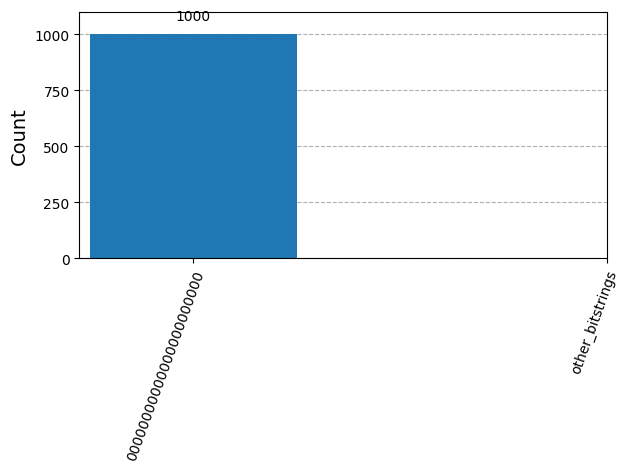

In [28]:
answer=results.get_counts()
#add a filter to avoid plotting states that are only measured a few times
threshold = int(0.1 * shots) # the threshold of plotting significant measurements
filteredAnswer = {k: v for k,v in answer.items() if v >= threshold} # filter the answer for better view of plots

removedCounts = np.sum([ v for k,v in answer.items() if v < threshold ]) # number of counts removed
filteredAnswer['other_bitstrings'] = removedCounts  # the removed counts are assigned to a new index

plot_histogram(filteredAnswer)